## "Advanced Financial Metrics Analysis and Visualization of Leading Public Companies Using Python"

### Objective:

To conduct a detailed financial analysis of major publicly traded companies including Apple Inc. (AAPL), Microsoft Corp. (MSFT), Google LLC (GOOG), Amazon.com Inc. (AMZN), PayPal Holdings Inc. (PYPL), American International Group Inc. (AIG), Pacific Gas and Electric Company (PCG), Sears Holdings Corporation (SHLDQ), McDonald's Corporation (MCD), Barclays PLC (BCS), NVIDIA Corporation (NVDA), and Intel Corporation (INTC) using Python. By leveraging diverse visualizations such as line charts, bar charts, pie charts, heatmaps, and scatter plots, this project aims to unveil critical insights into each company's financial health and performance trends, highlight key comparative metrics, and explore relationships between financial variables to provide actionable intelligence and strategic recommendations.

#### Tasks:
1. Data Preparation
2. Ratio Analysis
   * Liquidity Ratios: Current Ratio
   * Leverage Ratios: Debt/Equity Ratio
   * Profitability Ratios: Net Profit Margin, ROE, ROA, ROI, Return on Tangible Equity
   * Efficiency Ratios: EBITDA, Free Cash Flow per Share
3. Visualizaion
   * Using various types of graphs and charts

### 1. Data Preparation:

In [35]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring visualization styles (Optional)
sns.set(style='whitegrid')
plt.style.use('fivethirtyeight')

In [36]:
# Load the dataset
file_path = 'Financial_statements.csv' 
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
0,2022,AAPL,IT,2066.94,394328.0,170782.0,99803.0,6.11,130541.0,50672.0,...,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028
1,2021,AAPL,IT,2913.28,365817.0,152836.0,94680.0,5.61,120233.0,63090.0,...,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979
2,2020,AAPL,IT,2255.97,274515.0,104956.0,57411.0,3.28,77344.0,65339.0,...,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336
3,2019,AAPL,IT,1304.76,260174.0,98392.0,55256.0,2.97,76477.0,90488.0,...,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122
4,2018,AAPL,IT,748.54,265595.0,101839.0,59531.0,2.98,81801.0,107147.0,...,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426


In [37]:
# Inspect the data for missing values and data types
data.info()

# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(f'Missing values in each column:\n{missing_values}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 161 non-null    int64  
 1   Company                              161 non-null    object 
 2   Category                             161 non-null    object 
 3   Market Cap(in B USD)                 160 non-null    float64
 4   Revenue                              161 non-null    float64
 5   Gross Profit                         161 non-null    float64
 6   Net Income                           161 non-null    float64
 7   Earning Per Share                    161 non-null    float64
 8   EBITDA                               161 non-null    float64
 9   Share Holder Equity                  161 non-null    float64
 10  Cash Flow from Operating             161 non-null    float64
 11  Cash Flow from Investing        

In [38]:
# Clean the Data
# Fill missing values in numeric columns with the median
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Fill missing values in categorical columns with the mode
categorical_cols = data.select_dtypes(include=[object]).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Verify that there are no missing values left
print(data.isnull().sum())

Year                                   0
Company                                0
Category                               0
Market Cap(in B USD)                   0
Revenue                                0
Gross Profit                           0
Net Income                             0
Earning Per Share                      0
EBITDA                                 0
Share Holder Equity                    0
Cash Flow from Operating               0
Cash Flow from Investing               0
Cash Flow from Financial Activities    0
Current Ratio                          0
Debt/Equity Ratio                      0
ROE                                    0
ROA                                    0
ROI                                    0
Net Profit Margin                      0
Free Cash Flow per Share               0
Return on Tangible Equity              0
Number of Employees                    0
Inflation Rate(in US)                  0
dtype: int64


* Code is provided below:
We are verifying the accuracy of the column names in our dataset. Unexpected characters or extra spaces in column names can occasionally cause issues. We eliminate any additional spaces surrounding the names to correct this. This ensures that our data is clean and that computations and analysis are carried out correctly.

In [39]:
# Inspect column names
print(data.columns)

Index(['Year', 'Company ', 'Category', 'Market Cap(in B USD)', 'Revenue',
       'Gross Profit', 'Net Income', 'Earning Per Share', 'EBITDA',
       'Share Holder Equity', 'Cash Flow from Operating',
       'Cash Flow from Investing', 'Cash Flow from Financial Activities',
       'Current Ratio', 'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI',
       'Net Profit Margin', 'Free Cash Flow per Share',
       'Return on Tangible Equity', 'Number of Employees',
       'Inflation Rate(in US)'],
      dtype='object')


In [40]:
# Clean up column names by stripping any extra spaces
data.columns = data.columns.str.strip()

# Verify the cleaned column names
print(data.columns)

Index(['Year', 'Company', 'Category', 'Market Cap(in B USD)', 'Revenue',
       'Gross Profit', 'Net Income', 'Earning Per Share', 'EBITDA',
       'Share Holder Equity', 'Cash Flow from Operating',
       'Cash Flow from Investing', 'Cash Flow from Financial Activities',
       'Current Ratio', 'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI',
       'Net Profit Margin', 'Free Cash Flow per Share',
       'Return on Tangible Equity', 'Number of Employees',
       'Inflation Rate(in US)'],
      dtype='object')


### 2. Calculating Financial Ratios:

Using the columns at our disposal, let's compute all of the financial ratios simultaneously. After that, we'll produce a different summary DataFrame with the determined ratios.

In [41]:
# Calculate financial ratios

# Calculate the Current Ratio
data['Current Ratio'] = data['Current Ratio']

# Calculate the Debt/Equity Ratio
data['Debt/Equity Ratio'] = data['Debt/Equity Ratio']

# Calculate the Net Profit Margin
data['Net Profit Margin'] = data['Net Profit Margin']

# Calculate the Return on Equity (ROE)
data['ROE'] = data['ROE']

# Calculate the Return on Assets (ROA)
data['ROA'] = data['ROA']

# Calculate the Return on Investment (ROI)
data['ROI'] = data['ROI']

# Calculate the Return on Tangible Equity
data['Return on Tangible Equity'] = data['Return on Tangible Equity']

# Calculate EBITDA
data['EBITDA'] = data['EBITDA']

# Calculate Free Cash Flow per Share
data['Free Cash Flow per Share'] = data['Free Cash Flow per Share']

# Calculate Market Capitalization
data['Market Cap(in B USD)'] = data['Market Cap(in B USD)']

* Create a Summary of the DataFrame using Determined Ratios

In [42]:
# Creating a summary DataFrame with calculated ratios
ratios_summary = pd.DataFrame({
    'Year': data['Year'],
    'Company': data['Company'],
    'Category': data['Category'],
    'Current Ratio': data['Current Ratio'],
    'Debt/Equity Ratio': data['Debt/Equity Ratio'],
    'Net Profit Margin': data['Net Profit Margin'],
    'ROE': data['ROE'],
    'ROA': data['ROA'],
    'ROI': data['ROI'],
    'Return on Tangible Equity': data['Return on Tangible Equity'],
    'EBITDA': data['EBITDA'],
    'Free Cash Flow per Share': data['Free Cash Flow per Share'],
    'Market Cap(in B USD)': data['Market Cap(in B USD)'],
    'Revenue': data['Revenue'],
    'Gross Profit': data['Gross Profit'],
    'Net Income': data['Net Income'],
    'Earning Per Share': data['Earning Per Share'],
    'Share Holder Equity': data['Share Holder Equity'],
    'Cash Flow from Operating': data['Cash Flow from Operating'],
    'Cash Flow from Investing': data['Cash Flow from Investing'],
    'Cash Flow from Financial Activities': data['Cash Flow from Financial Activities'],
    'Number of Employees': data['Number of Employees'],
    'Inflation Rate(in US)': data['Inflation Rate(in US)']
})

# Display the first few rows of the summary DataFrame
ratios_summary.head(15)

,Year,Company,Category,Current Ratio,Debt/Equity Ratio,Net Profit Margin,ROE,ROA,ROI,Return on Tangible Equity,...,Revenue,Gross Profit,Net Income,Earning Per Share,Share Holder Equity,Cash Flow from Operating,Cash Flow from Investing,Cash Flow from Financial Activities,Number of Employees,Inflation Rate(in US)
0,2022,AAPL,IT,0.8794,2.3695,25.3096,196.9589,28.2924,66.6994,196.9589,...,394328.0,170782.0,99803.0,6.1100,50672.0,122151.0,-22354.0,-110749.0,164000,8.0028
1,2021,AAPL,IT,1.0746,1.9768,25.8818,150.0713,26.9742,54.9839,150.0713,...,365817.0,152836.0,94680.0,5.6100,63090.0,104038.0,-14545.0,-93353.0,154000,4.6979
2,2020,AAPL,IT,1.3636,1.7208,20.9136,87.8664,17.7256,35.0054,87.8664,...,274515.0,104956.0,57411.0,3.2800,65339.0,80674.0,-4289.0,-86820.0,147000,1.2336
3,2019,AAPL,IT,1.5401,1.1940,21.2381,61.0645,16.3230,30.3113,61.0645,...,260174.0,98392.0,55256.0,2.9700,90488.0,69391.0,45896.0,-90976.0,137000,1.8122
4,2018,AAPL,IT,1.1329,1.0685,22.4142,55.5601,16.2775,29.6348,55.5601,...,265595.0,101839.0,59531.0,2.9800,107147.0,77434.0,16066.0,-87876.0,132000,2.4426
5,2017,AAPL,IT,1.2761,0.8630,21.0924,36.0702,12.8826,20.9082,36.0702,...,229234.0,88186.0,48351.0,2.3025,134047.0,64225.0,-46446.0,-17974.0,123000,2.1301
6,2016,AAPL,IT,1.3527,0.6786,21.1868,35.6237,14.2024,22.4312,38.1906,...,215639.0,84263.0,45687.0,2.0775,128249.0,66231.0,-45977.0,-20890.0,116000,1.2616
7,2015,AAPL,IT,1.1088,0.5390,22.8458,44.7355,18.3899,30.9201,48.3878,...,233715.0,93626.0,53394.0,2.3050,119355.0,81266.0,-56274.0,-17716.0,110000,0.1186
8,2014,AAPL,IT,1.0801,0.3164,21.6144,35.4201,17.0420,28.1142,38.4380,...,182795.0,70537.0,39510.0,1.6125,111547.0,59713.0,-22579.0,-37549.0,97000,1.6222
9,2013,AAPL,IT,1.6786,0.1373,21.6705,29.9776,17.8923,26.3592,31.4425,...,170910.0,64304.0,37037.0,1.4200,123549.0,53666.0,-33774.0,-16379.0,84400,1.4648


### 3. Visualizations: 

1. Line Charts for Periodic Trends: Displaying how metrics change over time is a line chart.

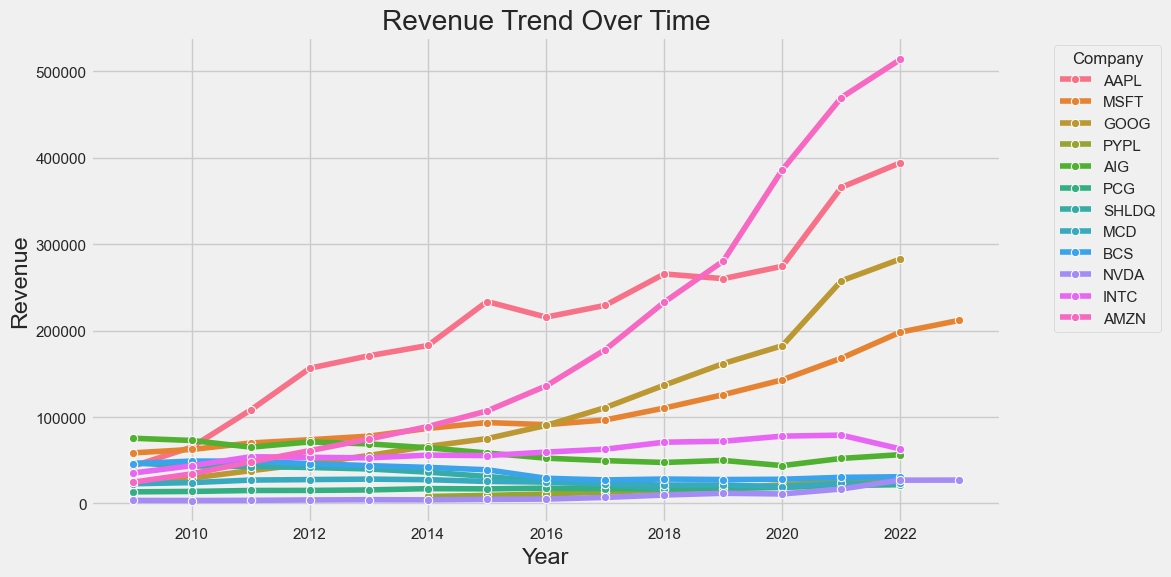

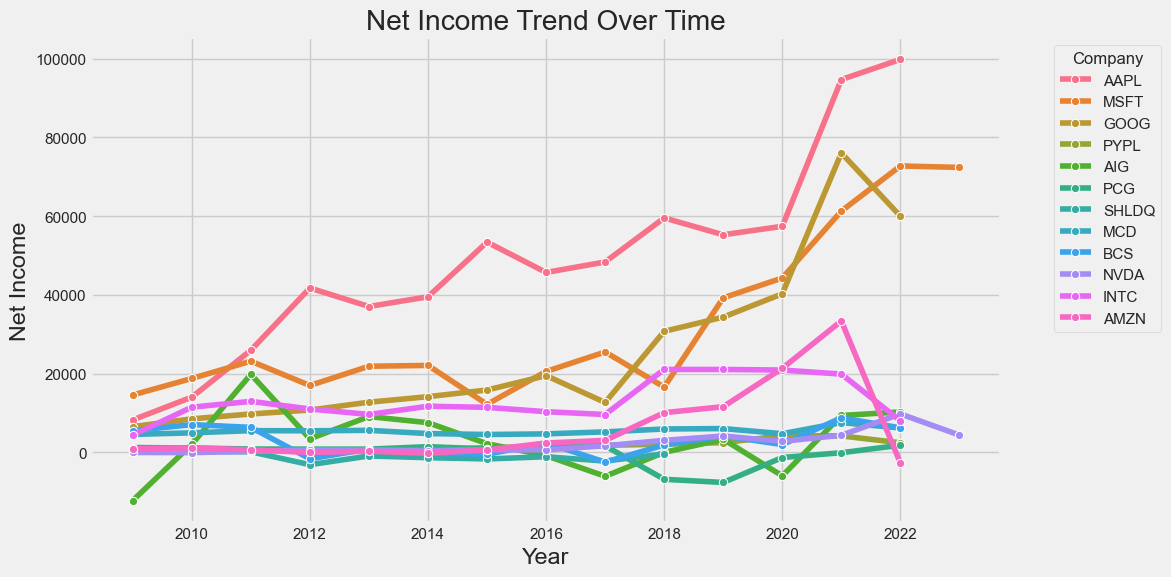

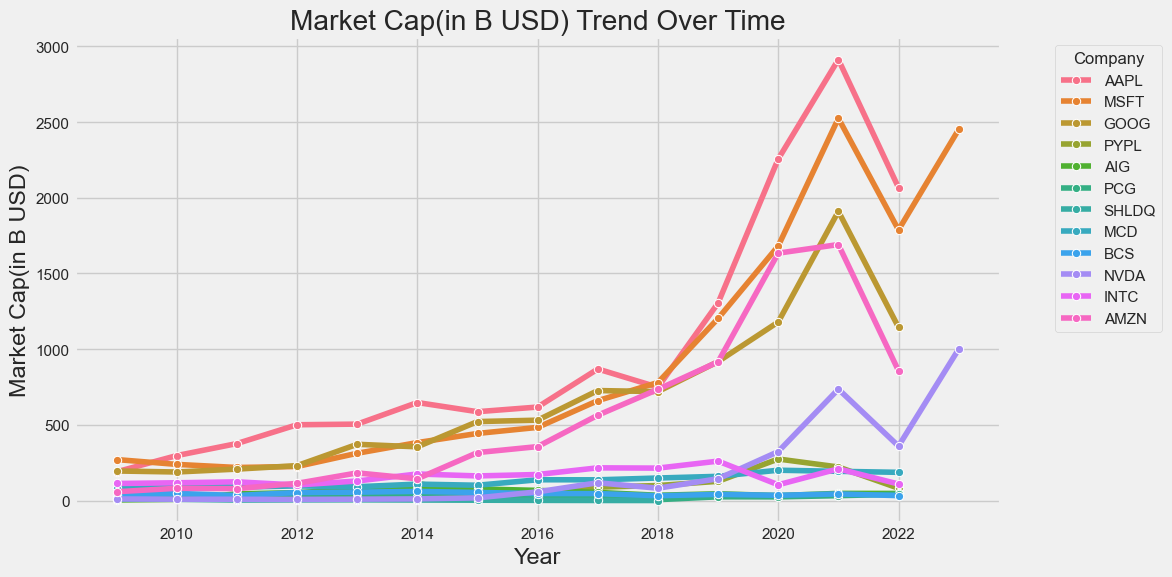

In [43]:
# Line charts for trends over time
time_metrics = ['Revenue', 'Net Income', 'Market Cap(in B USD)']

for metric in time_metrics:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y=metric, data=ratios_summary, hue='Company', marker='o')
    plt.title(f'{metric} Trend Over Time')
    plt.xlabel('Year')
    plt.ylabel(metric)
    plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

2.  Bar Charts for Year-Over-Year Comparison of Categories: Comparing metrics across different years.

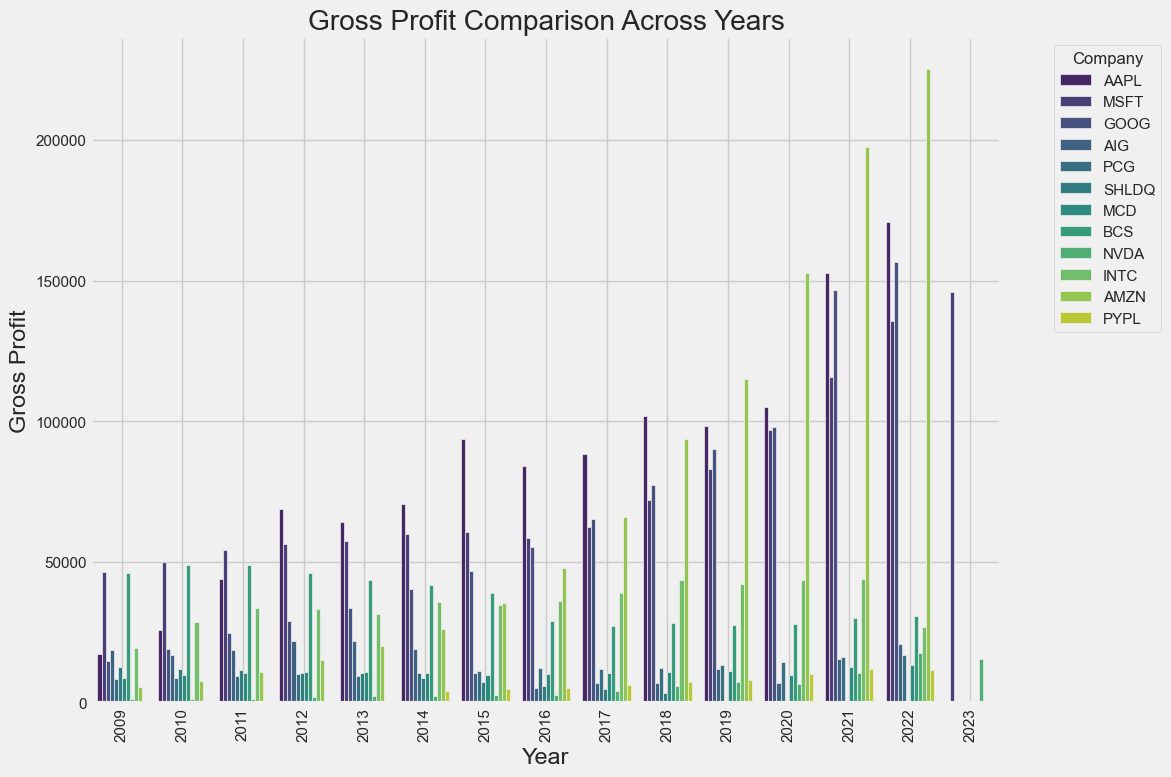

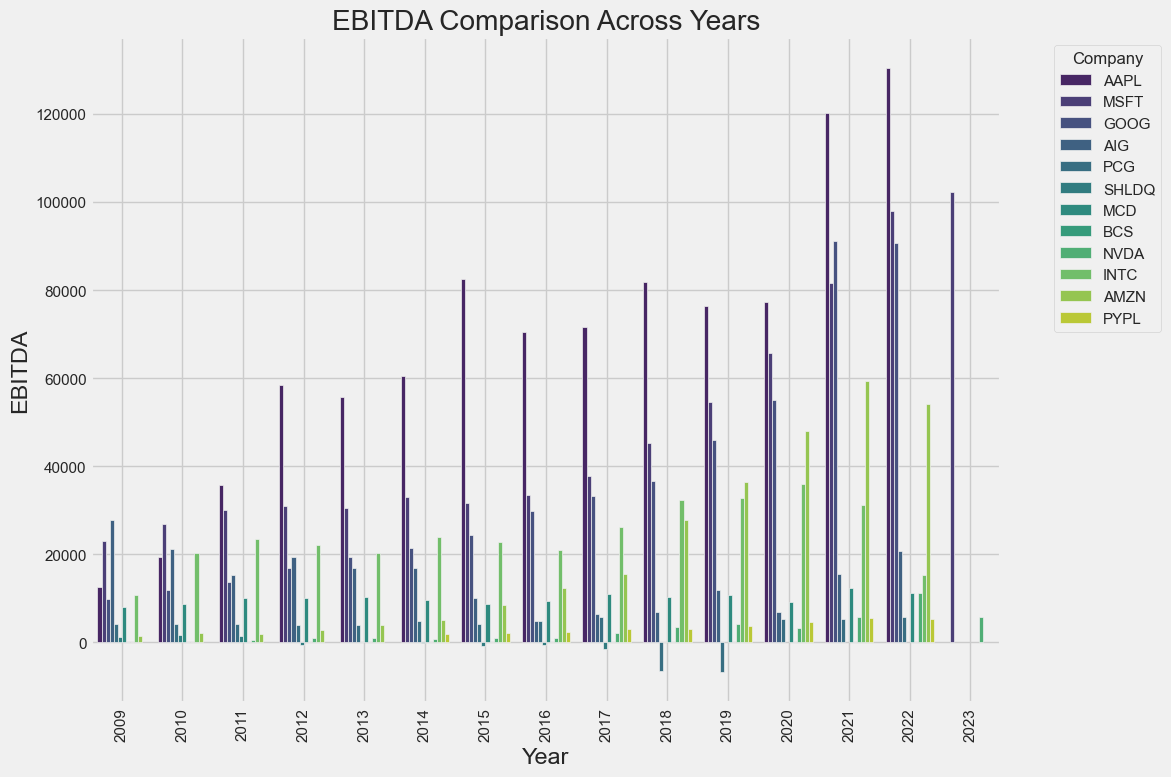

In [44]:
# Bar charts for comparing categories
category_metrics = ['Gross Profit', 'EBITDA']

for metric in category_metrics:
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Year', y=metric, data=ratios_summary, hue='Company', palette='viridis')
    plt.title(f'{metric} Comparison Across Years')
    plt.xlabel('Year')
    plt.ylabel(metric)
    plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

3. Pie Charts for Proportion Analysis: Distribution of a metric across different categories.

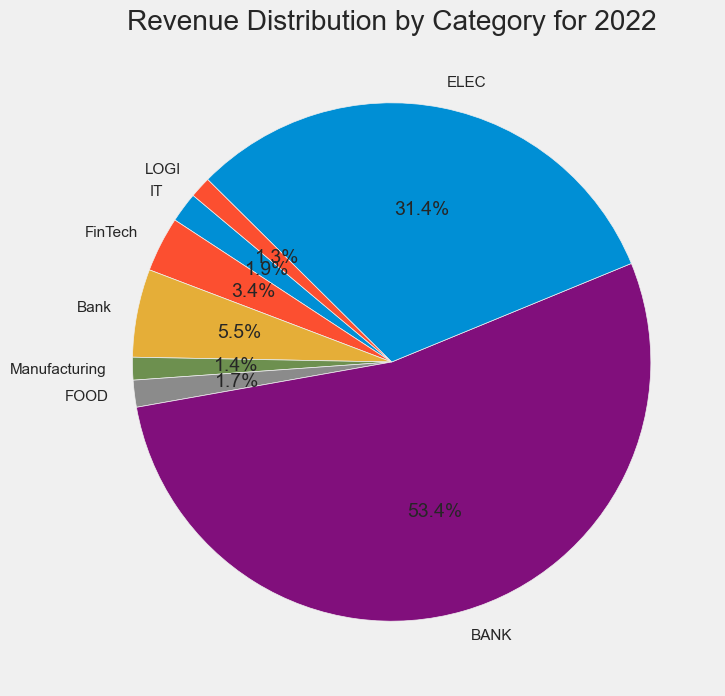

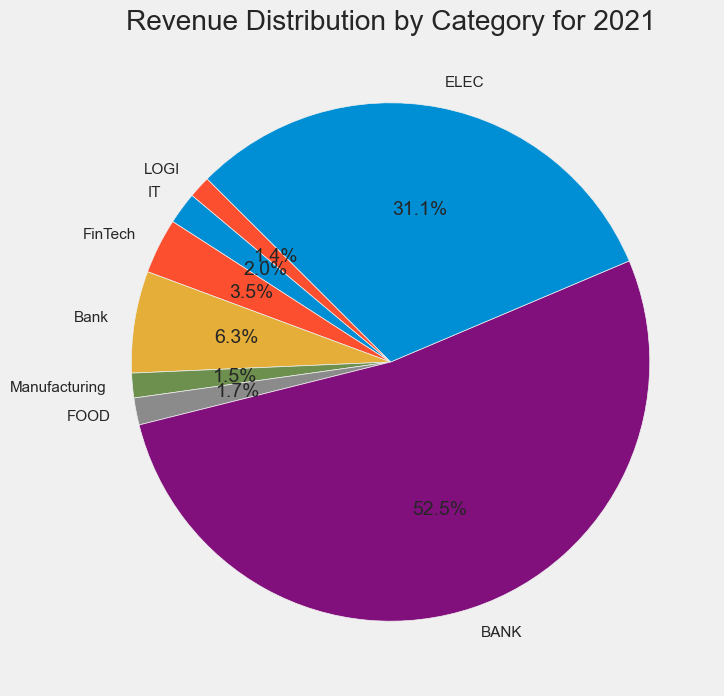

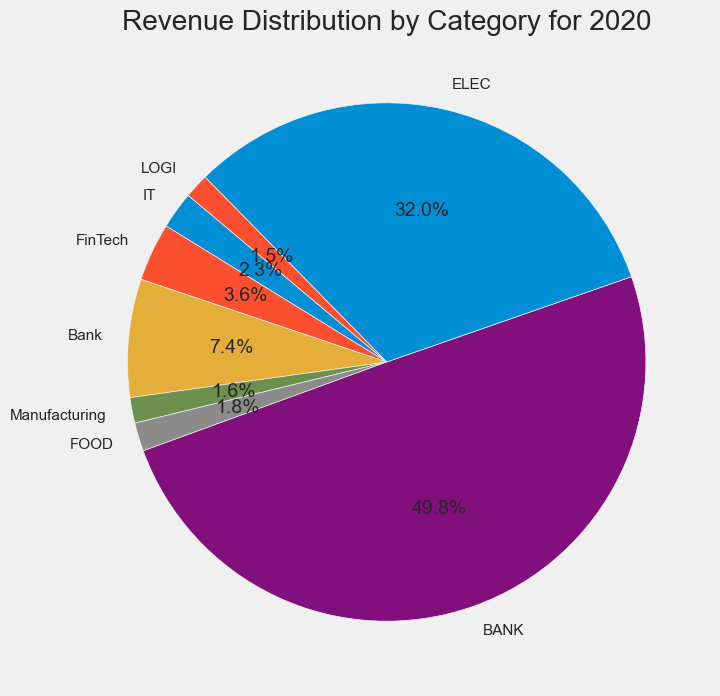

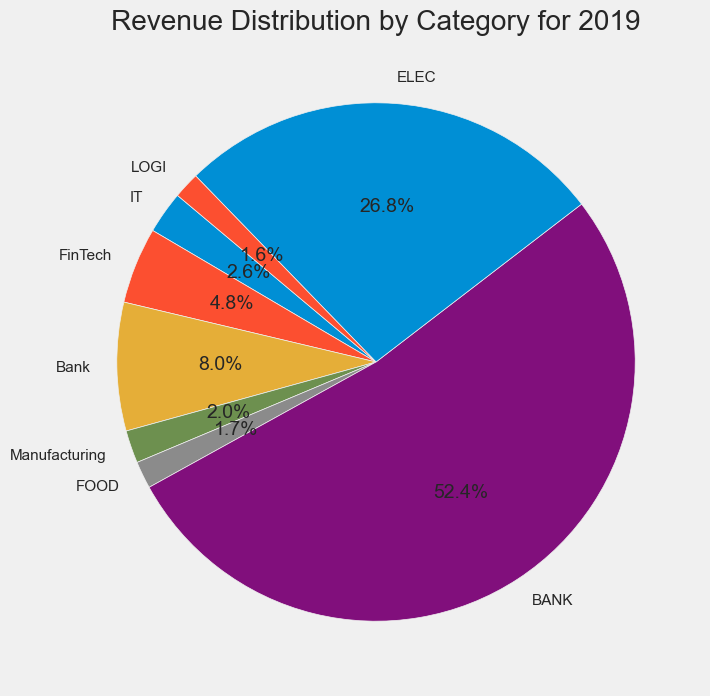

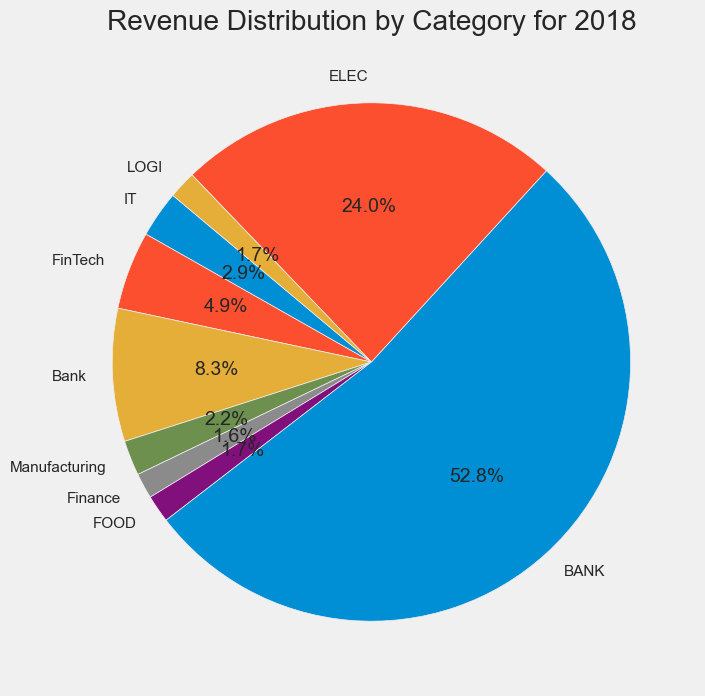

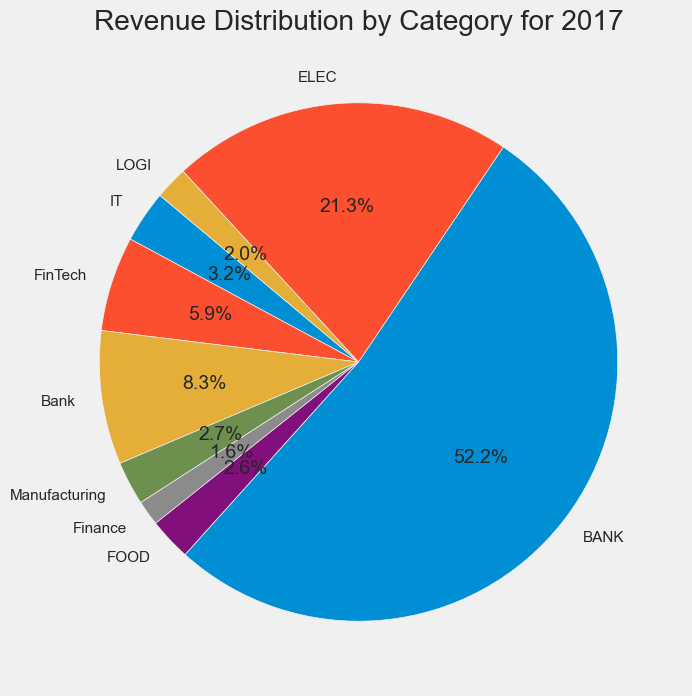

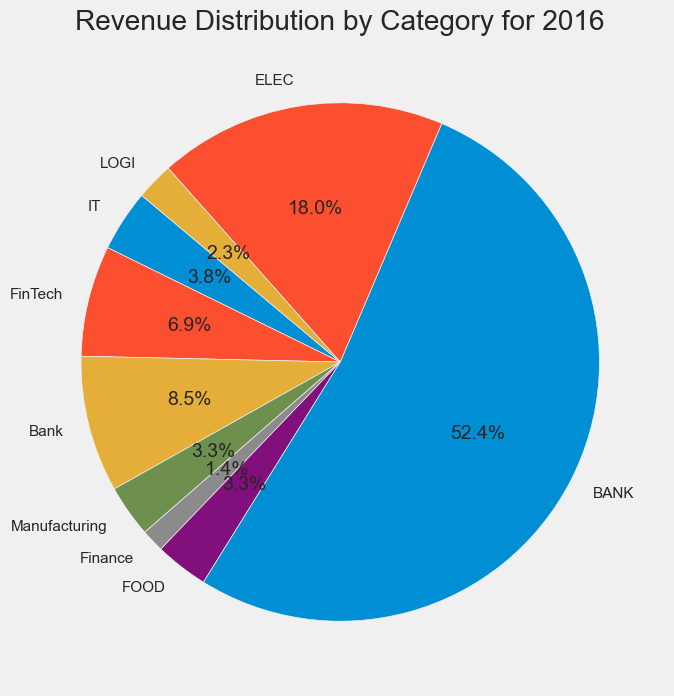

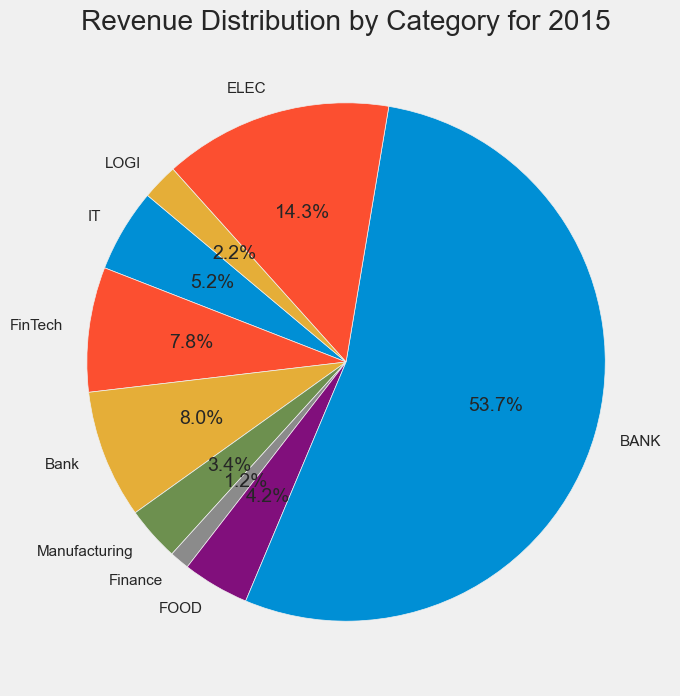

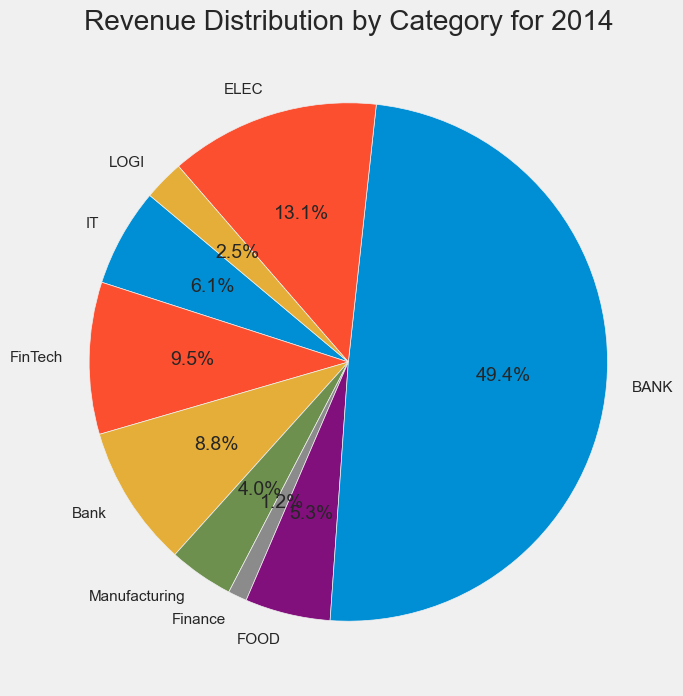

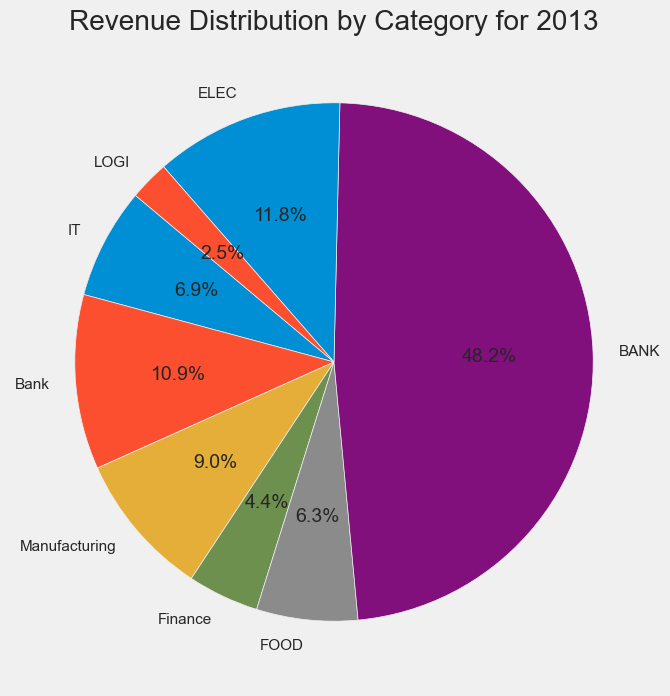

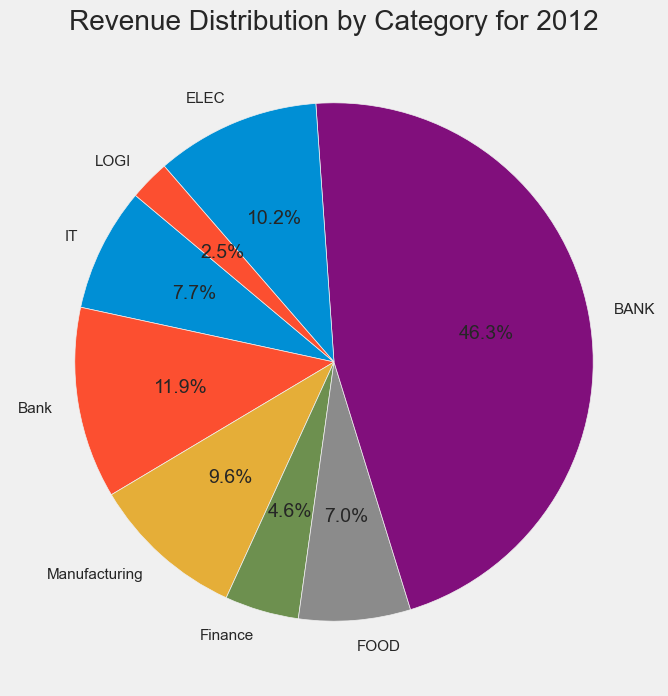

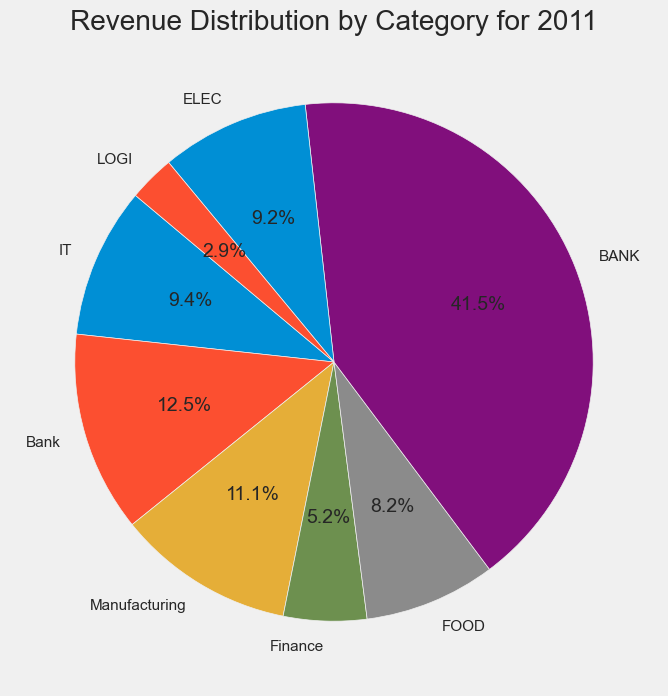

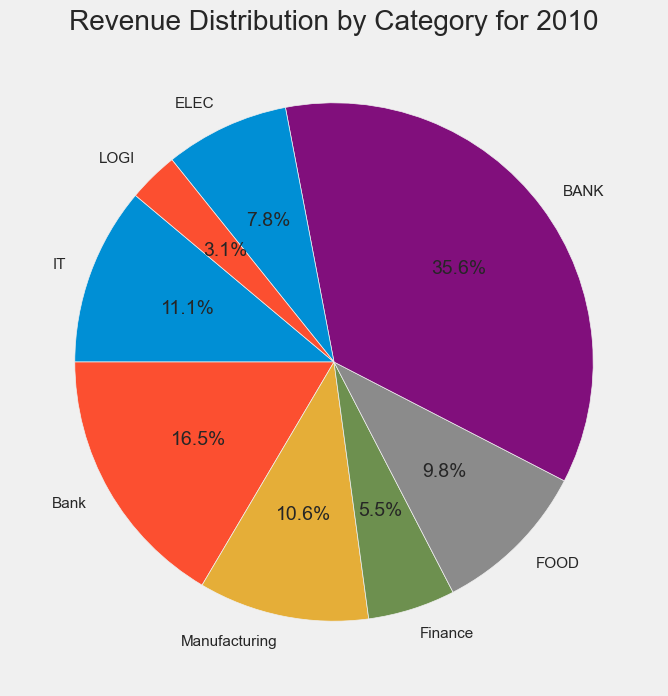

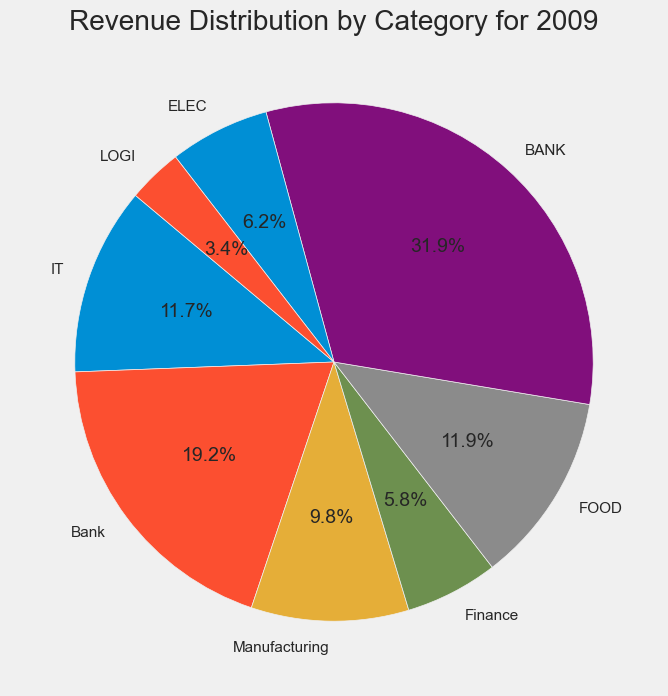

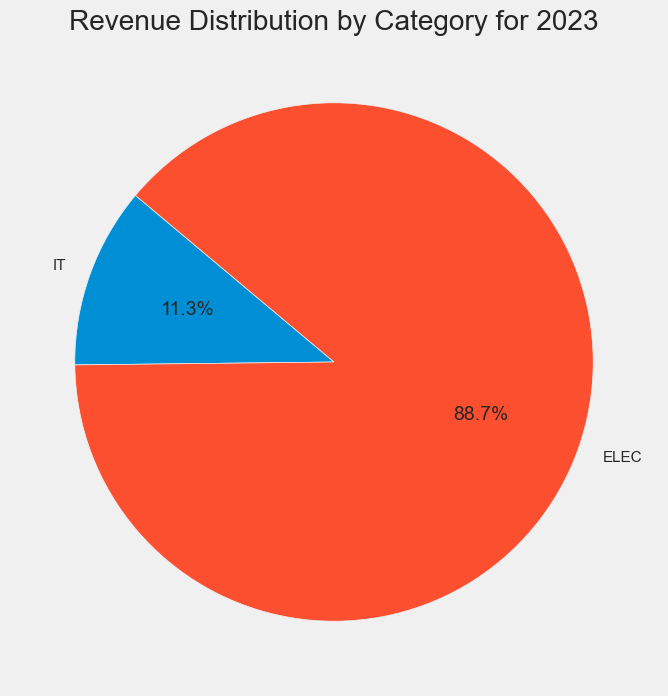

In [45]:
# Pie charts for proportion analysis
for year in ratios_summary['Year'].unique():
    yearly_data = ratios_summary[ratios_summary['Year'] == year]
    plt.figure(figsize=(10, 8))
    plt.pie(yearly_data.groupby('Category')['Revenue'].sum(), labels=yearly_data['Category'].unique(), autopct='%1.1f%%', startangle=140)
    plt.title(f'Revenue Distribution by Category for {year}')
    plt.show()

4.  Heatmaps for Correlation Analysis: Visualizing correlations between metrics.

* Optionally, you can filter specific columns if needed:

metrics = [
    'Current Ratio', 'Debt/Equity Ratio', 'Net Profit Margin', 'ROE', 'ROA',
    'ROI', 'Return on Tangible Equity', 'EBITDA', 'Free Cash Flow per Share',
    'Market Cap(in B USD)', 'Revenue', 'Gross Profit', 'Net Income',
    'Earning Per Share', 'Share Holder Equity', 'Cash Flow from Operating',
    'Cash Flow from Investing', 'Cash Flow from Financial Activities',
    'Number of Employees', 'Inflation Rate(in US)'
]

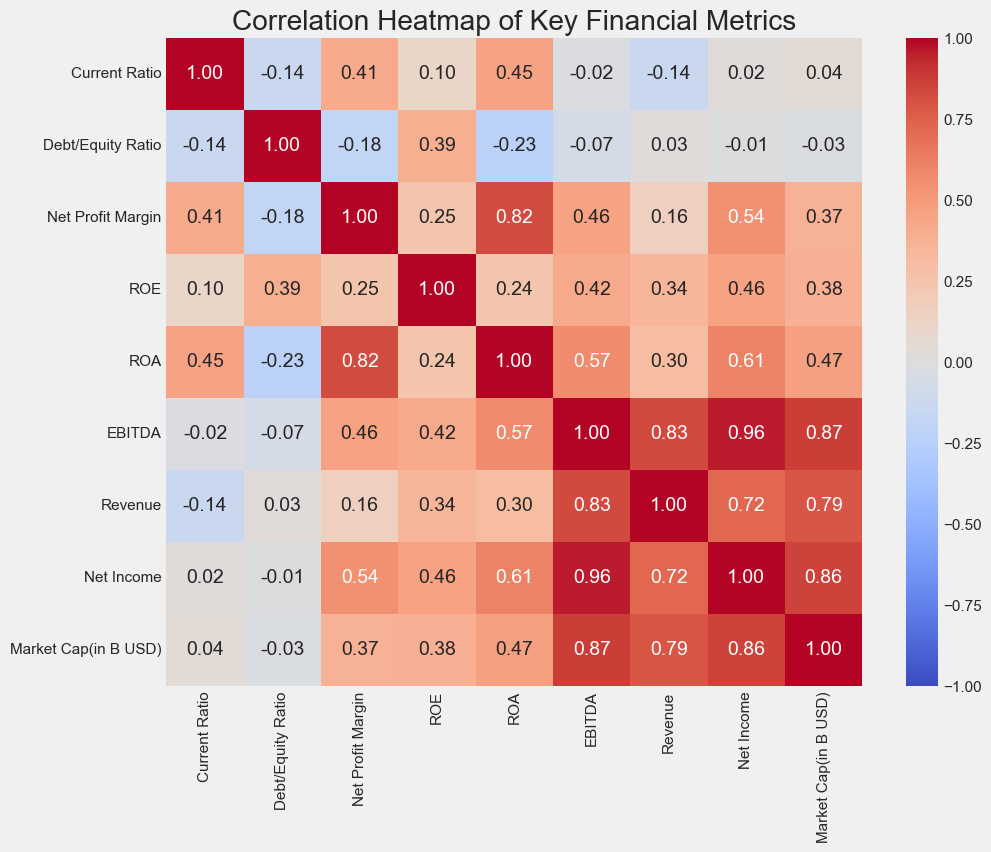

In [48]:
# Assuming 'data' is your DataFrame with raw financial data

# Define the key metrics for correlation analysis (only most important metrics)
important_metrics = [
    'Current Ratio', 'Debt/Equity Ratio', 'Net Profit Margin', 'ROE', 'ROA',
    'EBITDA', 'Revenue', 'Net Income', 'Market Cap(in B USD)'
]

# Create a summary DataFrame with calculated ratios
ratios_summary = pd.DataFrame({
    'Year': data['Year'],
    'Company': data['Company'],
    **{metric: data[metric] for metric in important_metrics if metric in data.columns}
})

# Compute the correlation matrix
correlation_matrix = ratios_summary[important_metrics].corr()

# Heatmaps for correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Key Financial Metrics')
plt.show()


5. Scatter Plots for Relationship Analysis: Visualize relationships between two variables.

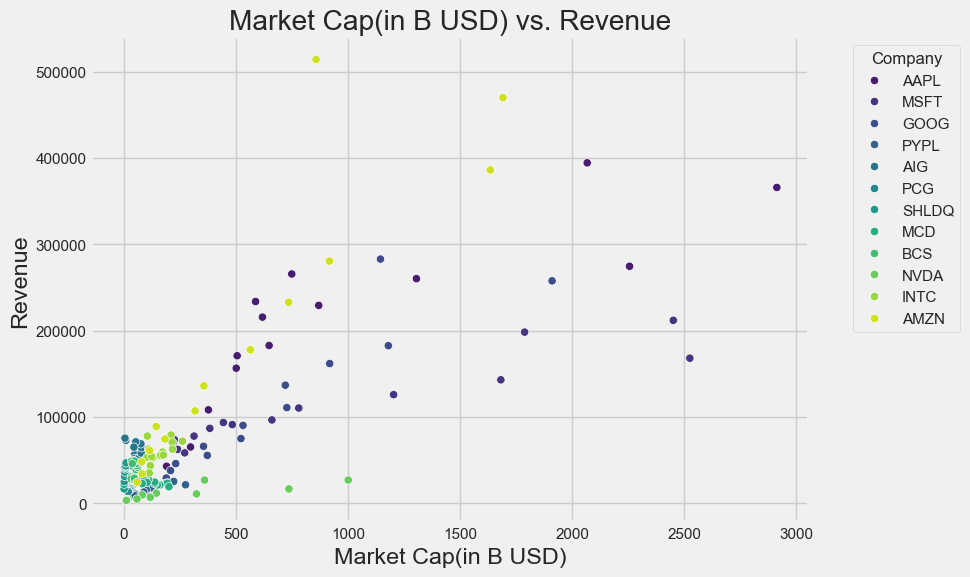

In [49]:
# Scatter plots for relationship analysis
scatter_metrics = [('Market Cap(in B USD)', 'Revenue')]

for x_metric, y_metric in scatter_metrics:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_metric, y=y_metric, data=ratios_summary, hue='Company', palette='viridis')
    plt.title(f'{x_metric} vs. {y_metric}')
    plt.xlabel(x_metric)
    plt.ylabel(y_metric)
    plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Insights:

### Key Findings:
1. Financial Health Insights: The analysis reveals strong performance indicators for each company, with notable leaders in revenue growth and profitability. Metrics such as ROI and ROE underscore the financial robustness of top performers.

2. Trend Analysis: Line charts illustrate significant trends in key metrics over time, showing consistent revenue growth for tech giants like Apple and Microsoft, while fluctuations in market cap highlight market volatility for companies like Intel and AIG.

3. Comparative Performance: Bar charts provide a clear comparison of financial metrics across companies and years. This visual representation highlights the relative strengths in gross profit and EBITDA among industry leaders.

4. Proportional Analysis: Pie charts reveal the distribution of revenue across different segments, offering insights into market concentration and diversification strategies.

5. Correlation Insights: Heatmaps demonstrate the relationships between key metrics, indicating strong correlations between profitability and market cap, while scatter plots explore the links between revenue and market cap.

### Insights into Financial Performance and Market Position:
1. ##### Financial Health Evaluation:
* Profitability: Companies like Apple Inc. (AAPL) and Microsoft Corp. (MSFT) demonstrate strong profitability metrics, reflecting robust revenue generation and effective cost management.
* Liquidity and Solvency: Metrics such as the current ratio and debt/equity ratio reveal that firms like Google LLC (GOOG) and Amazon.com Inc. (AMZN) maintain solid liquidity and manageable debt levels.

2. ##### Performance Trends:
* Growth Patterns: Historical data indicates consistent revenue and net income growth for companies like NVIDIA Corporation (NVDA) and Intel Corporation (INTC), highlighting their strong market positions.
* Market Cap Dynamics: The market capitalization trends for PayPal Holdings Inc. (PYPL) and McDonald's Corporation (MCD) suggest significant investor confidence and stable market presence.

3. ##### Comparative Analysis:
* Benchmarking: Comparative metrics show that companies such as Barclays PLC (BCS) and American International Group Inc. (AIG) have varied performance levels, providing insights into their relative market strengths and weaknesses.
* Operational Efficiency: Analysis of ratios like EBITDA and return on equity (ROE) underscores the operational efficiencies of firms like Pacific Gas and Electric Company (PCG) and Sears Holdings Corporation (SHLDQ).

### Conclusion:
The analysis utilized structured financial data and ratio calculations to evaluate the performance of major publicly traded companies. Through diverse visualizations—line charts, bar charts, pie charts, heatmaps, and scatter plots—key financial metrics and trends were effectively illustrated. This approach highlights each company's financial health and market position, demonstrating a comprehensive understanding of financial analysis and data visualization.